# How's the Weather?
In this notebook we're going to look at and compare some weather data for two cites: Springfield, MO and Tampa, FL.
To get good weather data you should head over to the National Climatic Data Center website, you can order custom datasets, but be prepared to do some munging when you start wrangling with the data, as you will see shortly. Also, depending on the queue it could be as long as a few days before you get your datasets too.  Personally I've gotten them in under 5 minutes and as long as 3 days. You will see that I got two files for this project, one for Springfield and one for Tampa. The choices I selected for them were the daily precipitation, daily high temperature, and daily low temperature.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 6)
#matplotlib.style.use('ggplot')

So first of all, we need to grab our csv files and see what we need to clean up.  As a first step, find the set of values that actually has the values we want for each column.  The main station usually seems to be at or near the airport and that's a good way to find the right station name. To make it look less messy I got rid of this step here.

In [2]:
import1 = pd.read_csv('spfld.csv')

In [3]:
station1 = import1.loc[import1['STATION_NAME']=='SPRINGFIELD REGIONAL AIRPORT MO US']

In [4]:
station1.describe()

,DATE,PRCP,TAVG,TMAX,TMIN
count,7.310000e+02,731.000000,731.000000,731.000000,731.000000
mean,2.015567e+07,-13.547209,58.404925,55.325581,34.577291
std,5.014726e+03,369.831484,17.504369,372.807814,372.063694
min,2.015010e+07,-9999.000000,9.000000,-9999.000000,-9999.000000
25%,2.015070e+07,0.000000,46.000000,58.000000,35.000000
50%,2.016010e+07,0.000000,60.000000,72.000000,49.000000
75%,2.016070e+07,0.040000,74.000000,84.000000,65.000000
max,2.016123e+07,6.030000,87.000000,98.000000,77.000000


Now we see that we appear to have entries that are a little unreasonable if we look at the minimum values (-9999 degrees sounds pretty cold to me).  To be gin we'll just look at the maximum temperatures and we're going to go ahead and replace those bad values with the mean of the rest of the set.

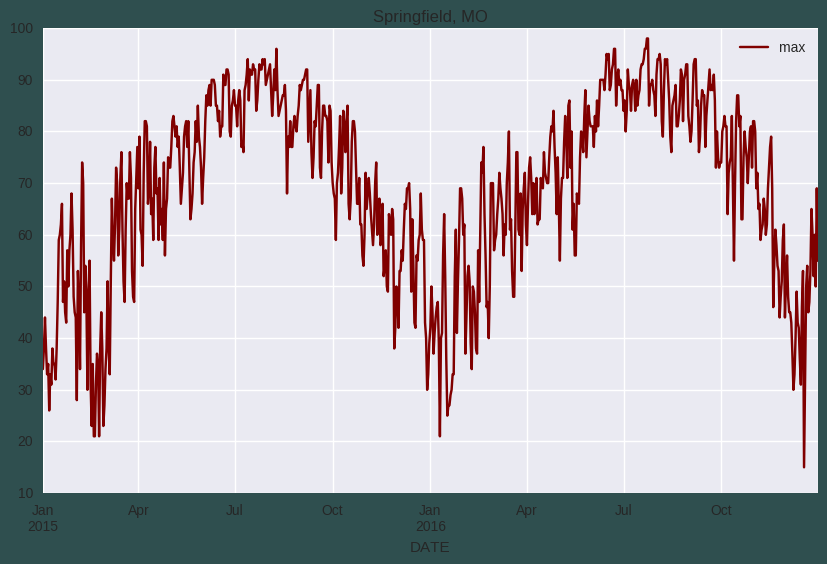

,max
count,731.000000
mean,69.098495
std,17.811606
min,15.000000
25%,58.000000
50%,72.000000
75%,84.000000
max,98.000000


In [5]:
dates = pd.to_datetime(station1['DATE'],format='%Y%m%d')
s_max_temps = pd.DataFrame(station1['TMAX'].values, columns=['max'],index = dates)
s_max_temps[s_max_temps<-100]= int(s_max_temps[s_max_temps['max']>-100].mean())
fig, ax = plt.subplots(facecolor='darkslategray')
s_max_temps.plot(color='maroon',title='Springfield, MO', ax=ax, );#xticks=[]);
#ax = pd.ewma(s_max_temps,freq="D", halflife=20).plot(ax=ax,label='Avg.',color='blue')
plt.show()
s_max_temps.describe()

Our set for Springfield is looking okay; let's go ahead and get some data for Tampa here. Once we've finished rearranging it we'll plot that too and see how it looks.

In [6]:
import2 = pd.read_csv('tampa.csv')
station2 = import2[import2['STATION_NAME'] == 'TAMPA INTERNATIONAL AIRPORT FL US']
station2.describe()

,DATE,PRCP,TAVG,TMAX,TMIN
count,7.310000e+02,731.000000,731.000000,731.000000,731.000000
mean,2.015567e+07,0.158769,74.868673,83.504788,67.879617
std,5.014726e+03,0.467617,8.703597,8.310641,9.915216
min,2.015010e+07,0.000000,44.000000,52.000000,34.000000
25%,2.015070e+07,0.000000,71.000000,80.000000,63.000000
50%,2.016010e+07,0.000000,77.000000,85.000000,71.000000
75%,2.016070e+07,0.040000,81.000000,90.000000,75.500000
max,2.016123e+07,4.390000,87.000000,97.000000,82.000000


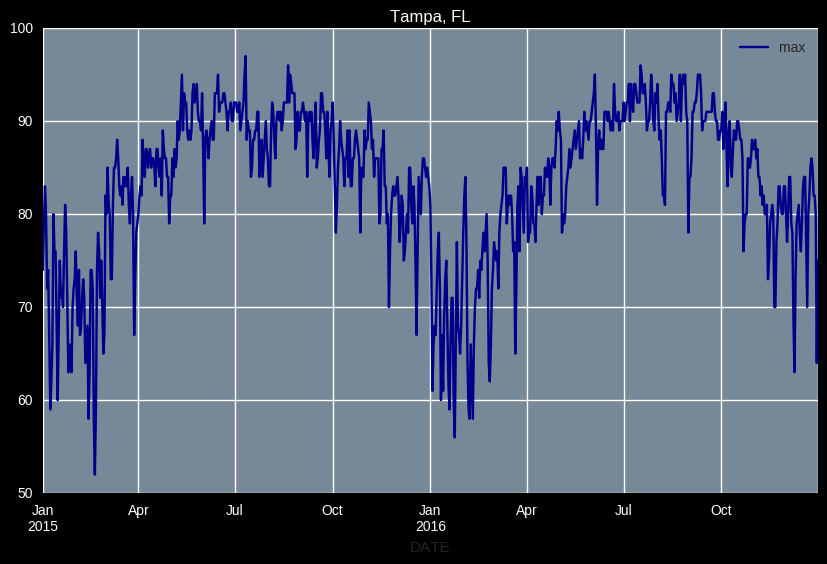

,max
count,731.000000
mean,83.504788
std,8.310641
min,52.000000
25%,80.000000
50%,85.000000
75%,90.000000
max,97.000000


In [7]:
dates2 = pd.to_datetime(station2['DATE'],format='%Y%m%d')
t_max_temps = pd.DataFrame(station2['TMAX'].values, columns=['max'],index = dates)
t_max_temps[t_max_temps<-100]= int(t_max_temps[t_max_temps['max']>-100].mean())
fig, ax = plt.subplots(facecolor='black');ax.title.set_color('white');
ax.set_axis_bgcolor('lightslategray'); ax.tick_params(colors='white');
t_max_temps.plot(title='Tampa, FL', ax=ax, color='darkblue');
plt.show()
t_max_temps.describe()

So we have our two data sets of the daily high temperatures for both locations and now we'll just need to put them together. TGFP (thank goodness for pandas) we can do this almost the same way as we could in R.

In [8]:
max_temps = pd.concat([s_max_temps,t_max_temps],axis=1)
max_temps.columns = ['Springfield','Tampa']


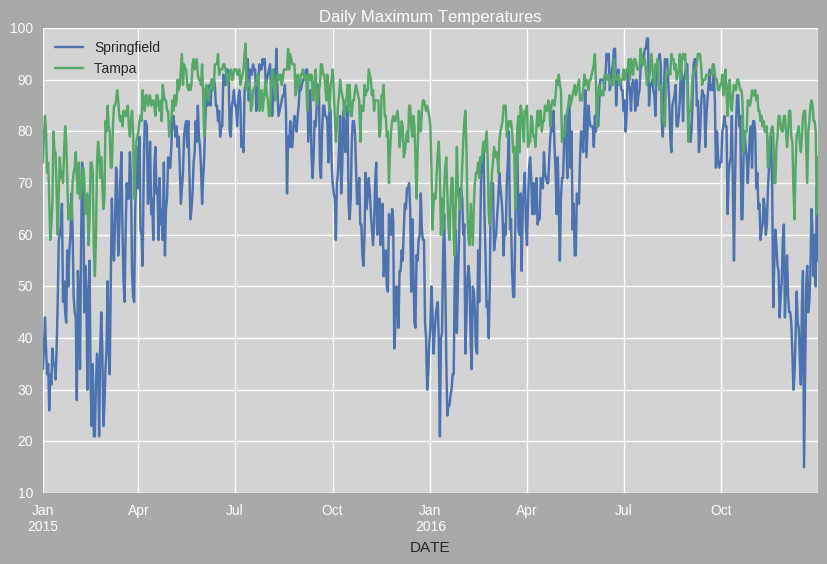

In [9]:
fig, ax = plt.subplots(facecolor='darkgray');ax.title.set_color('white');
ax.set_axis_bgcolor('lightgray'); ax.tick_params(colors='white');
max_temps.plot(ax=ax, title='Daily Maximum Temperatures'); plt.show()

We've now been able to plot them together, which is great, but now the problem is that other than the general deduction that during the winter it is usually warmer in Florida (we should know this already) we can't draw much from this graph.  Another great thing we can do is to regroup the data into categories.  I'm going to group the two sets of temperatures by month and plot each one side by side using a violin plot, this has a varying thickness by how many values fall around the same value.

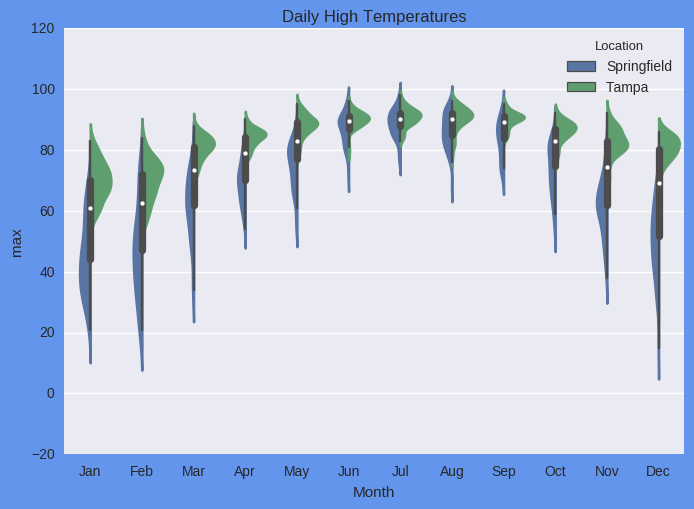

In [10]:
import calendar
sns.set_style('darkgrid');
sns.set(rc={'legend.fancybox':'True', 'figure.facecolor':'cornflowerblue'});
alts_max_temps = pd.DataFrame(s_max_temps);altt_max_temps = pd.DataFrame(t_max_temps);
alts_max_temps['Location'] = 'Springfield';altt_max_temps['Location'] = 'Tampa';
alt_max = pd.concat([alts_max_temps,altt_max_temps]);
alt_max['Month'] = alt_max.index.month;
alt_max['Month'] = alt_max['Month'].apply(lambda x: calendar.month_abbr[x])
maxplot = sns.violinplot(x = "Month", y = "max", hue = "Location", data = alt_max, split=True);
maxplot.set_title('Daily High Temperatures');
plt.show()

Now that looks more helpful, from this kind of graph we can easily estimate the average temperature each month as well. We'll go ahead and use the same data model for the daily minimum temperatures as well and plot it the same way.

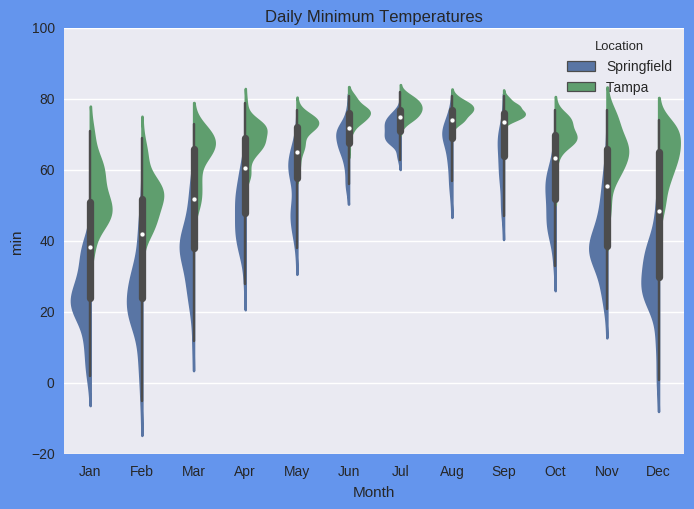

In [14]:
s_min_temps = pd.DataFrame(station1['TMIN'].values, columns=['min'],index = dates)
s_min_temps[s_min_temps<-100]= int(s_min_temps[s_min_temps['min']>-100].mean())
dates2 = pd.to_datetime(station2['DATE'],format='%Y%m%d')
t_min_temps = pd.DataFrame(station2['TMIN'].values, columns=['min'],index = dates)
t_min_temps[t_min_temps<-100]= int(t_min_temps[t_min_temps['min']>-100].mean())
min_temps = pd.concat([s_min_temps,t_min_temps],axis=1)
min_temps.columns = ['Springfield','Tampa']
import calendar
sns.set_style('darkgrid')
sns.set(rc={'legend.fancybox':'True', 'figure.facecolor':'cornflowerblue'})
alts_min_temps = pd.DataFrame(s_min_temps);altt_min_temps = pd.DataFrame(t_min_temps);
alts_min_temps['Location'] = 'Springfield';altt_min_temps['Location'] = 'Tampa';
alt_min = pd.concat([alts_min_temps,altt_min_temps])
alt_min['Month'] = alt_min.index.month
alt_min['Month'] = alt_min['Month'].apply(lambda x: calendar.month_abbr[x])
minplot = sns.violinplot(x = "Month", y = "min", hue = "Location", data = alt_min, split=True);
minplot.set_title('Daily Minimum Temperatures');
plt.show()

Nice, now we can compare the daily high and low temperatures for the last two years between the two cities. One last thing we started out wanting to look at is the amount of precipitation.  We're going to follow the same process as before, except here after we group by the month we'll take the sum over the whole month and look at the monthly total precipitation.

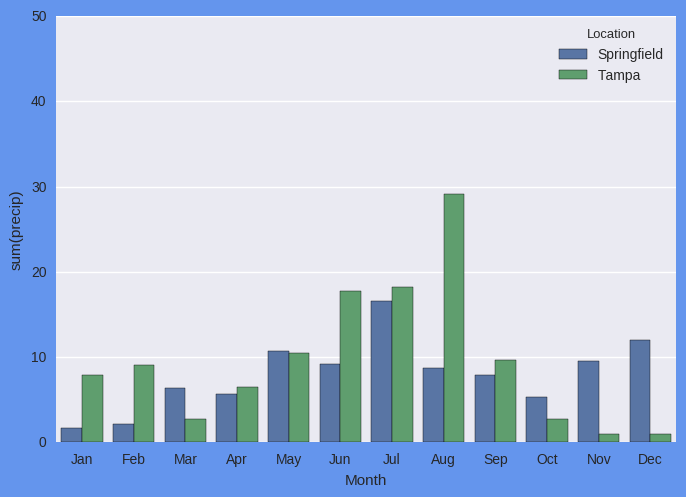

In [12]:
s_pre = pd.DataFrame(station1['PRCP'].values, columns=['precip'],index = dates)
s_pre[s_pre<-100]= int(s_pre[s_pre['precip']>-100].mean())
dates2 = pd.to_datetime(station2['DATE'],format='%Y%m%d')
t_pre = pd.DataFrame(station2['PRCP'].values, columns=['precip'],index = dates)
t_pre[t_pre<-100]= int(t_pre[t_pre['precip']>-100].mean())
pre = pd.concat([s_pre,t_pre],axis=1)
pre.columns = ['Springfield','Tampa']
import calendar
sns.set_style('darkgrid')
sns.set(rc={'legend.fancybox':'True', 'figure.facecolor':'cornflowerblue'})
alts_pre = pd.DataFrame(s_pre);altt_pre = pd.DataFrame(t_pre);
alts_pre['Location'] = 'Springfield';altt_pre['Location'] = 'Tampa';
alt_pre = pd.concat([alts_pre,altt_pre])
alt_pre['Month'] = alt_pre.index.month
alt_pre['Month'] = alt_pre['Month'].apply(lambda x: calendar.month_abbr[x])
sns.barplot( x='Month', y='precip', hue='Location', data=alt_pre, estimator=sum, errwidth=0);
plt.show()

Wow that's a lot of rain in August.  Someone that lives in Tampa once told me that during that part of the year it rains every afternoon. I guess now I have a really strong reason to believe them.  It certainly seems that Tampa has more pronounced rainy and dry seasons. One more thing remains a mystery here, how much does it really rain in Tampa than Springfield?

In [19]:
print('Springfield total = ',sum(s_pre['precip']),'in.  Tampa total = ',sum(t_pre['precip']),'in.')

Springfield total =  95.99 in.  Tampa total =  116.06 in.


So over two years, 2015 and 2016, Tampa got 20 more inches than Springfield, or we could just call this about 10 inches per year to save a little trouble. 

So all in all we've been able to take a decent glimpse at some of the weather characteristics of the two cities and get a better overall picture of how they compare. Of course there's many more things to take in to consideration as well, like hurricanes and tornadoes, or the number of windy days in each, but that can wait for another day. 